In [194]:
%matplotlib inline

import csv

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import mne
import seaborn as sns
import math
from fooof.utils.download import load_fooof_data
from pathlib import Path
from fooof import FOOOFGroup
from fooof import FOOOF
from fooof.utils.params import compute_knee_frequency

from spiketools.plts.utils import make_axes


ImportError: cannot import name 'plot_topo_colorbar' from 'plots' (/home/b1044271/Columbia/Aperiodic_sleep/Notebooks/../helpers/plots.py)

In [195]:
import sys
sys.path.append('/home/b1044271/Columbia/Aperiodic_sleep/helpers')
from plots import plot_topo_colorbar


ImportError: cannot import name 'plot_topo_colorbar' from 'plots' (/home/b1044271/Columbia/Aperiodic_sleep/Notebooks/../helpers/plots.py)

In [8]:
# Import custom project code
import sys

sys.path.append('../helpers')
from plots import plot_topo

In [9]:
# E137: Oz, E110: Pz, E21: Fz, E257: Cz
# get the staging list
path_stage = Path('/home/b1044271/EEGsleep/SleepStaging/mat/mne2/')
stage_files = os.listdir(path_stage)
stage_files = [file for file in stage_files]
stage_files = sorted(stage_files)

stages = ['N1','N2','N3','RM','AW']

In [10]:
# get the subjects list
Data_path = '/home/b1044271/Columbia/Preprocessed/Better_ica/'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)


In [24]:
# Settings for the PSD calac
fs = 250
t  = 5
SETTINGS_B = { 'method' : 'welch', 'average' : 'mean', 'fmin' :1 , 'fmax': 45, 'n_fft':fs*5, 'n_overlap': fs*t*0.5}
path_results = Path('/home/b1044271/Columbia/Results/PSDs')
path_frqs = Path('/home/b1044271/Columbia/Results/PSDs/Freqs')

In [81]:
SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'fixed'}
SETTINGS_F2={'max_n_peaks':8, 'aperiodic_mode':'knee'}

fm1 = FOOOFGroup(**SETTINGS_F1)

fm2 = FOOOFGroup(**SETTINGS_F2)

# paramters for montage
montage = mne.channels.make_standard_montage('GSN-HydroCel-257')
montage.ch_names[-1] = 'E257'
info    = mne.create_info(EEG.ch_names, fs, 'eeg')

In [58]:
i = 0
N1n={}
N2n={}
N3n={}
AWn={}
RMn={}

for x in subj_files:
    EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
    events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers
    epochs = mne.Epochs(EEG, events=events, tmin=-30, tmax=0)
    
    raw = mne.io.RawArray(np.zeros([len(EEG.ch_names), 1]), info, verbose=False)
    raw = raw.set_montage(montage)   
    
    N1s = epochs['1']
    N2s = epochs['2']
    N3s = epochs['3']
    REs = epochs['5']
    AWs = epochs['0']

    # Settings for PSD calculation using welch's
    N1 = N1s.compute_psd(**SETTINGS_B) #calculate psd over 5s widnow , range 1 -45Hz
    N2 = N2s.compute_psd(**SETTINGS_B) #N2
    N3 = N3s.compute_psd(**SETTINGS_B)
    AW = AWs.compute_psd(**SETTINGS_B)
    RM = REs.compute_psd(**SETTINGS_B)
    
    epoch_no = min([len(N1._data),len(N2._data),len(N3._data),len(AW._data),len(RM._data)])

    N1n[i] = N1._data[sorted(np.random.choice(len(N1._data), size=epoch_no, replace=False))]
    N2n[i] = N2._data[sorted(np.random.choice(len(N2._data), size=epoch_no, replace=False))]
    N3n[i] = N3._data[sorted(np.random.choice(len(N3._data), size=epoch_no, replace=False))]
    RMn[i] = RM._data[sorted(np.random.choice(len(RM._data), size=epoch_no, replace=False))]
    AWn[i] = AW._data[sorted(np.random.choice(len(AW._data), size=epoch_no, replace=False))]
    
    i = i+1
   
        
        

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
1 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


33 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
147 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
23 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
15 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
79 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Not setting metadata
927 matching events found
Setting baseline interval to [-30.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 7501 original time points ...


/tmp/ipykernel_3864255/2970525007.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, x), preload = True) # read raw .set file
/tmp/ipykernel_3864255/2970525007.py:10: RuntimeWarning: This filename (/home/b1044271/EEGsleep/SleepStaging/mat/mne2/VP01_SS_250_mne.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events = mne.read_events(Path(path_stage, stage_files[0])) #read staging markers


0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 465 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 140 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 75 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)
Using data from preloaded Raw for 161 events and 7501 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


In [88]:
S_N1_NK = np.ones([17,183]) * np.nan
S_N2_NK= np.ones([17,183]) * np.nan
S_N3_NK= np.ones([17,183]) * np.nan
S_RM_NK= np.ones([17,183]) * np.nan
S_AW_NK= np.ones([17,183]) * np.nan

S_N1_K= np.ones([17,183]) * np.nan
S_N2_K= np.ones([17,183]) * np.nan
S_N3_K= np.ones([17,183]) * np.nan
S_RM_K= np.ones([17,183]) * np.nan
S_AW_K= np.ones([17,183]) * np.nan

R_N1_NK= np.ones([17,183]) * np.nan
R_N2_NK= np.ones([17,183]) * np.nan
R_N3_NK= np.ones([17,183]) * np.nan
R_RM_NK= np.ones([17,183]) * np.nan
R_AW_NK= np.ones([17,183]) * np.nan

R_N1_K= np.ones([17,183]) * np.nan
R_N2_K= np.ones([17,183]) * np.nan
R_N3_K= np.ones([17,183]) * np.nan
R_RM_K= np.ones([17,183]) * np.nan
R_AW_K= np.ones([17,183]) * np.nan

K_N1_K= np.ones([17,183]) * np.nan
K_N2_K= np.ones([17,183]) * np.nan
K_N3_K= np.ones([17,183]) * np.nan
K_RM_K= np.ones([17,183]) * np.nan
K_AW_K= np.ones([17,183]) * np.nan


for i in np.arange(17):
    fm1.fit(N1._freqs, np.mean(N1n[i], axis = 0), [N1._freqs[0] , N1._freqs[-1]])
    S_N1_NK[i,0:183] = fm1.get_params('aperiodic_params','exponent')
    R_N1_NK[i,0:183] = fm1.get_params('r_squared')
   
    fm1.fit(N2._freqs, np.mean(N2n[i], axis = 0), [N1._freqs[0] , N1._freqs[-1]])
    S_N2_NK[i,0:183] = fm1.get_params('aperiodic_params','exponent')
    R_N2_NK[i,0:183] = fm1.get_params('r_squared')
    
    fm1.fit(N3._freqs, np.mean(N3n[i], axis = 0), [N1._freqs[0] , N1._freqs[-1]])
    S_N3_NK[i,0:183] = fm1.get_params('aperiodic_params','exponent')
    R_N3_NK[i,0:183] = fm1.get_params('r_squared')
    
    fm1.fit(N1._freqs, np.mean(RMn[i], axis = 0), [N1._freqs[0] , N1._freqs[-1]])
    S_RM_NK[i,0:183] = fm1.get_params('aperiodic_params','exponent')
    R_RM_NK[i,0:183] = fm1.get_params('r_squared')
    
    fm1.fit(N1._freqs, np.mean(AWn[i], axis = 0), [N1._freqs[0] , N1._freqs[-1]])
    S_AW_NK[i,0:183] = fm1.get_params('aperiodic_params','exponent')
    R_AW_NK[i,0:183] = fm1.get_params('r_squared')
    
    fm2.fit(N1._freqs, np.mean(N1n[i], axis = 0), [N1._freqs[0] , N1._freqs[-1]])
    S_N1_K[i,0:183] = fm2.get_params('aperiodic_params','exponent')
    R_N1_K[i,0:183] = fm2.get_params('r_squared')    
    K_N1_K[i,0:183] = fm2.get_params('aperiodic_params','knee')
    
    fm2.fit(N1._freqs, np.mean(N2n[i], axis = 0), [N1._freqs[0] , N1._freqs[-1]])
    S_N2_K[i,0:183] = fm2.get_params('aperiodic_params','exponent')
    R_N2_K[i,0:183] = fm2.get_params('r_squared')    
    K_N2_K[i,0:183] = fm2.get_params('aperiodic_params','knee')
    
    fm2.fit(N1._freqs, np.mean(N3n[i], axis = 0), [N1._freqs[0] , N1._freqs[-1]])
    S_N3_K[i,0:183] = fm2.get_params('aperiodic_params','exponent')
    R_N3_K[i,0:183] = fm2.get_params('r_squared')    
    K_N3_K[i,0:183] = fm2.get_params('aperiodic_params','knee')
    
    fm2.fit(N1._freqs, np.mean(AWn[i], axis = 0), [N1._freqs[0] , N1._freqs[-1]])
    S_RM_K[i,0:183] = fm2.get_params('aperiodic_params','exponent')
    R_RM_K[i,0:183] = fm2.get_params('r_squared')    
    K_RM_K[i,0:183] = fm2.get_params('aperiodic_params','knee')
    
    fm2.fit(N1._freqs, np.mean(RMn[i], axis = 0), [N1._freqs[0] , N1._freqs[-1]])
    S_AW_K[i,0:183] = fm2.get_params('aperiodic_params','exponent')
    R_AW_K[i,0:183] = fm2.get_params('r_squared')    
    K_AW_K[i,0:183] = fm2.get_params('aperiodic_params','knee')

Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Model fitting was unsuccessful.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Model fitting was unsuccessful.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Model fitting was unsuccessful.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

In [114]:
R_RM_K

array([[0.97758879, 0.97520096, 0.99362756, ..., 0.99343857, 0.9953771 ,
        0.99556514],
       [0.94128795, 0.99116826, 0.95434273, ..., 0.97271627, 0.97846653,
        0.99812018],
       [0.88473016, 0.87772015, 0.81143203, ..., 0.7682348 , 0.82999078,
        0.99743579],
       ...,
       [0.94077125, 0.92738725, 0.9726669 , ..., 0.98256869, 0.99511507,
        0.99647755],
       [0.99092725, 0.99787496, 0.99230061, ..., 0.99467135, 0.97628136,
        0.99523938],
       [0.99330362, 0.99728353, 0.95886794, ..., 0.99624126, 0.99526399,
        0.98694032]])

In [116]:
np.mean(R_N1_K,axis=0)+np.mean(R_N2_K,axis=0)+np.mean(R_RM_K,axis= 0) + np.mean(R_N3_K,axis=0)+ np.mean(R_AW_K,axis=0)

array([4.84640989, 4.87572019, 4.86493341, 4.9265341 , 4.96405668,
       4.97705855, 4.98533868, 4.98549262, 4.98276128, 4.8612278 ,
       4.86181315, 4.91442524, 4.95261585, 4.98124224, 4.9843966 ,
       4.98368997, 4.97654697, 4.85244717, 4.90176266, 4.95773708,
       4.95919389, 4.97773117, 4.97753608, 4.96788284, 4.89639616,
       4.9299738 , 4.95513353, 4.95616817, 4.9589236 , 4.94792017,
       4.88956392, 4.89325848, 4.90870341, 4.91768878, 4.91504662,
       4.82283949, 4.86362218, 4.85707496, 4.84305666, 4.87512051,
       4.903441  , 4.93720691, 4.96137285, 4.97868202, 4.87798956,
       4.87126193, 4.82219274, 4.79964205, 4.76157754, 4.84251589,
       4.89709608, 4.96902144, 4.87822382, 4.82928423, 4.78156017,
       4.74102588, 4.72922901, 4.83942201, 4.93198954, 4.9003402 ,
       4.81876429, 4.7191428 , 4.78789877, 4.81102009, 4.86962573,
       4.83819616, 4.75956338, 4.80794712, 4.84068025, 4.86051321,
       4.80350674, 4.87645097, 4.89494561, 4.91478894, 4.93613

(<matplotlib.image.AxesImage at 0x7f7b26df8be0>,
 <matplotlib.contour.QuadContourSet at 0x7f7b26df8eb0>)

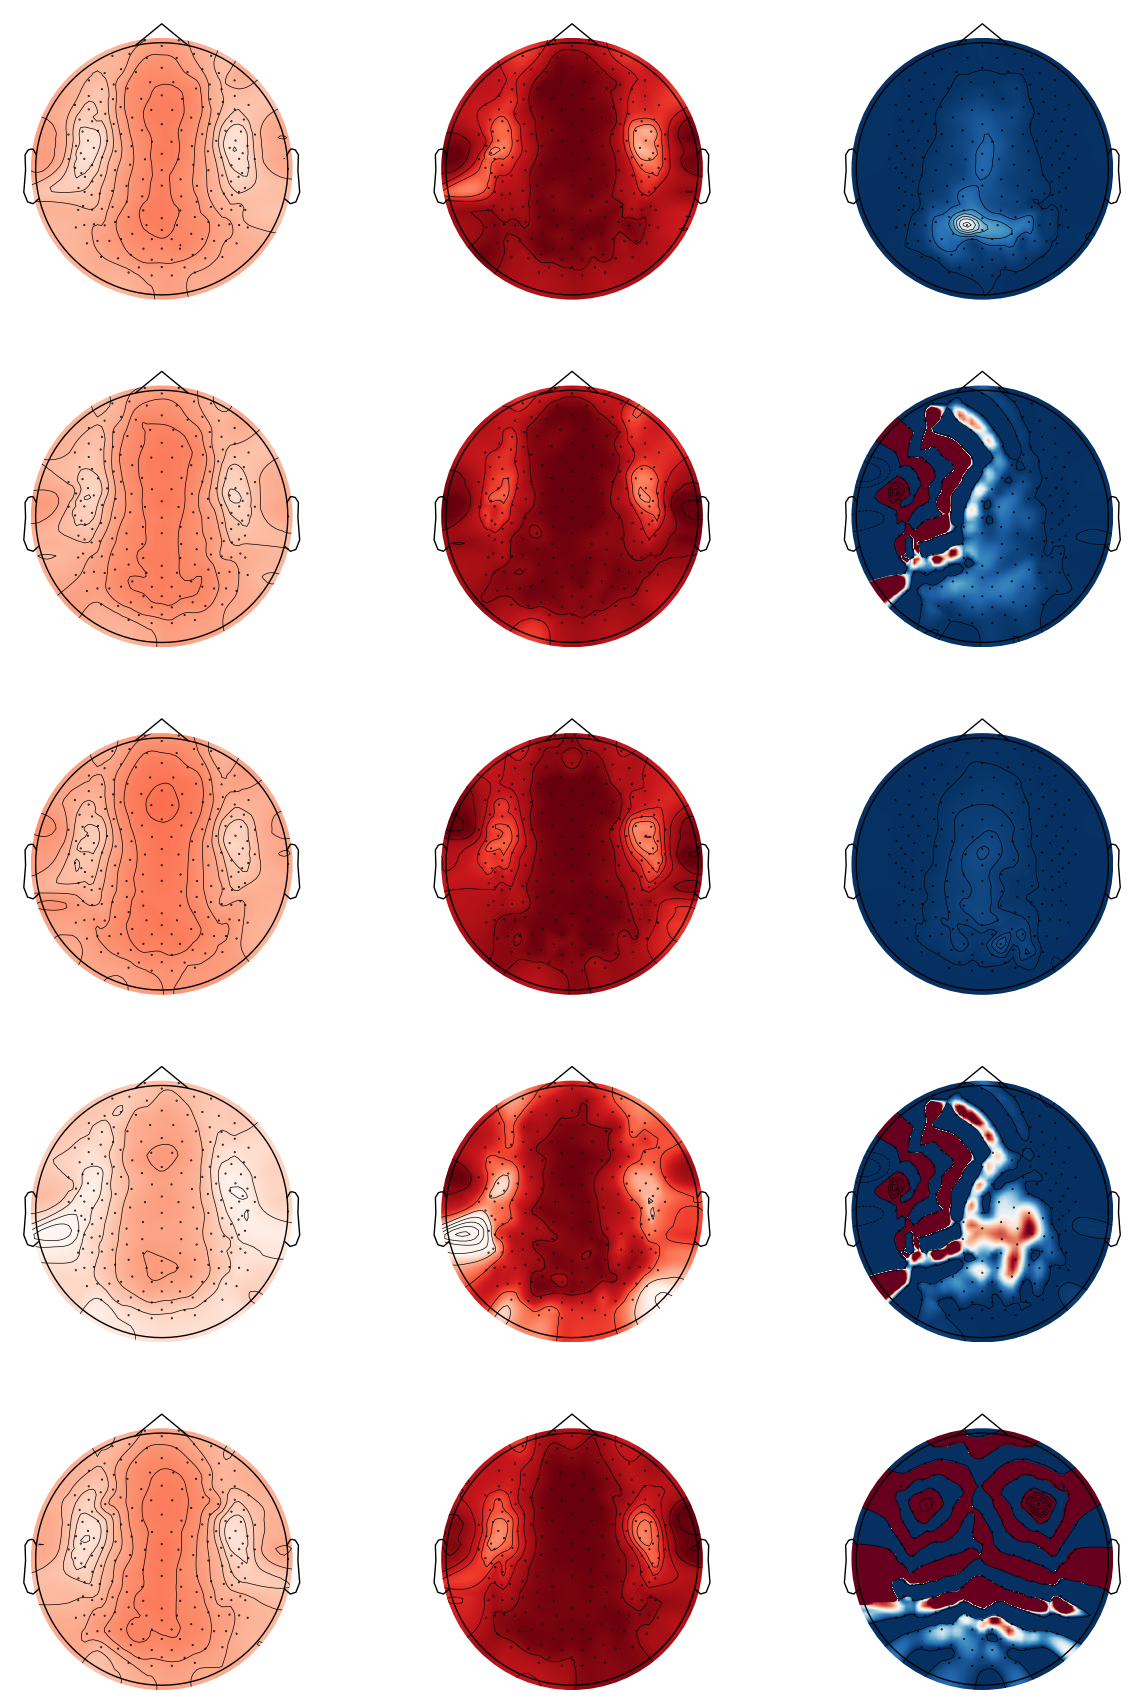

In [128]:
SK_min = min(np.concatenate((np.mean(S_N1_K,axis=0),np.mean(S_N2_K,axis=0),np.mean(S_RM_K,axis= 0) , np.mean(S_N3_K,axis=0), 
                            np.mean(S_AW_K,axis=0)),axis =0))

SK_max = max(np.concatenate((np.mean(S_N1_K,axis=0),np.mean(S_N2_K,axis=0)+np.mean(S_RM_K,axis= 0) , np.mean(S_N3_K,axis=0), 
                            np.mean(S_AW_K,axis=0)),axis = 0))

RK_min = min(np.concatenate((np.mean(R_N1_K,axis=0),np.mean(R_N2_K,axis=0),np.mean(R_RM_K,axis= 0), np.mean(R_N3_K,axis=0),
                            np.mean(R_AW_K,axis=0)),axis=0))
             
RK_max = max(np.concatenate((np.mean(R_N1_K,axis=0),np.mean(R_N2_K,axis=0),np.mean(R_RM_K,axis= 0) , np.mean(R_N3_K,axis=0), 
                            np.mean(R_AW_K,axis=0)),axis = 0))

KK_min = min(np.concatenate((np.mean(K_N1_K,axis=0),np.mean(K_N2_K,axis=0),np.mean(K_RM_K,axis= 0) , np.mean(K_N3_K,axis=0), 
                            np.mean(K_AW_K,axis=0)),axis =0))

KK_max = max(np.concatenate((np.mean(K_N1_K,axis=0) , np.mean(K_N2_K,axis=0) , np.mean(K_RM_K,axis= 0) , np.mean(K_N3_K,axis=0), 
             np.mean(K_AW_K,axis=0)),axis = 0 ))


ax = iter(make_axes(15, 3, figsize=(15, 20)))

mne.viz.plot_topomap(data = np.mean(S_N1_K,axis=0), pos = raw.info, vlim=(SK_min,SK_max),axes=next(ax), show=False)
mne.viz.plot_topomap(data = np.mean(R_N1_K,axis=0), pos = raw.info, vlim=(RK_min,RK_max),axes=next(ax), show=False)
mne.viz.plot_topomap(data = np.mean(K_N1_K,axis=0), pos = raw.info, vlim=(KK_min,100),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(S_N2_K,axis=0), pos = raw.info, vlim=(SK_min,SK_max),axes=next(ax), show=False)
mne.viz.plot_topomap(data = np.mean(R_N2_K,axis=0), pos = raw.info, vlim=(RK_min,RK_max),axes=next(ax), show=False)
mne.viz.plot_topomap(data = np.mean(K_N2_K,axis=0), pos = raw.info, vlim=(KK_min,100),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(S_N3_K,axis=0), pos = raw.info, vlim=(SK_min,SK_max),axes=next(ax), show=False)
mne.viz.plot_topomap(data = np.mean(R_N3_K,axis=0), pos = raw.info, vlim=(RK_min,RK_max),axes=next(ax), show=False)
mne.viz.plot_topomap(data = np.mean(K_N3_K,axis=0), pos = raw.info, vlim=(KK_min,100),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(S_RM_K,axis=0), pos = raw.info, vlim=(SK_min,SK_max),axes=next(ax), show=False)
mne.viz.plot_topomap(data = np.mean(R_RM_K,axis=0), pos = raw.info, vlim=(RK_min,RK_max),axes=next(ax), show=False)
mne.viz.plot_topomap(data = np.mean(K_RM_K,axis=0), pos = raw.info, vlim=(KK_min,100),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(S_AW_K,axis=0), pos = raw.info, vlim=(SK_min,SK_max),axes=next(ax), show=False)
mne.viz.plot_topomap(data = np.mean(R_AW_K,axis=0), pos = raw.info, vlim=(RK_min,RK_max),axes=next(ax), show=False)
mne.viz.plot_topomap(data = np.mean(K_AW_K,axis=0), pos = raw.info, vlim=(KK_min,100),axes=next(ax), show=False)

In [172]:
X = compute_knee_frequency(K_N1_K, S_N1_K)
X_N1 = np.ones([17,183]) * np.nan

idx=0
for i in X:
    idx2= 0
    for ii in i:
        if ii < 1 or math.isnan(ii) == True:
            X_N1[idx, idx2] = 1
        else:
            X_N1[idx, idx2] = ii
        idx2= idx2+1 
    idx=idx+1
    
X = compute_knee_frequency(K_N2_K, S_N2_K)
X_N2 = np.ones([17,183]) * np.nan

idx=0
for i in X:
    idx2= 0
    for ii in i:
        if ii < 1 or math.isnan(ii) == True:
            X_N2[idx, idx2] = 1
        else:
            X_N2[idx, idx2] = ii
        idx2= idx2+1 
    idx=idx+1 
    
X = compute_knee_frequency(K_N3_K, S_N3_K)
X_N3 = np.ones([17,183]) * np.nan

idx=0
for i in X:
    idx2= 0
    for ii in i:
        if ii < 1 or math.isnan(ii) == True:
            X_N3[idx, idx2] = 1
        else:
            X_N3[idx, idx2] = ii
        idx2= idx2+1 
    idx=idx+1   
    
X = compute_knee_frequency(K_RM_K, S_RM_K)
X_R = np.ones([17,183]) * np.nan

idx=0
for i in X:
    idx2= 0
    for ii in i:
        if ii < 1 or math.isnan(ii) == True:
            X_R[idx, idx2] = 1
        else:
            X_R[idx, idx2] = ii
        idx2= idx2+1 
    idx=idx+1  
    
X = compute_knee_frequency(K_AW_K, S_AW_K)
X_W = np.ones([17,183]) * np.nan

idx=0
for i in X:
    idx2= 0
    for ii in i:
        if ii < 1 or math.isnan(ii) == True:
            X_W[idx, idx2] = 1
        else:
            X_W[idx, idx2] = ii
        idx2= idx2+1 
    idx=idx+1 
        

 

In [183]:
KK_min = min(np.concatenate((np.mean(X_N1,axis=0),np.mean(X_N2,axis=0),np.mean(X_R,axis= 0) , np.mean(X_N3,axis=0), 
                            np.mean(X_W,axis=0)),axis =0))

KK_max = max(np.concatenate((np.mean(X_N1,axis=0),np.mean(X_N2,axis=0),np.mean(X_R,axis= 0) , np.mean(X_N3,axis=0), 
                            np.mean(X_W,axis=0)),axis =0))

max(X_R)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [181]:
np.shape(np.concatenate((np.mean(X_N1,axis=0),np.mean(X_N2,axis=0),np.mean(X_R,axis= 0) , np.mean(X_N3,axis=0), 
                            np.mean(X_W,axis=0)),axis =0))

(915,)

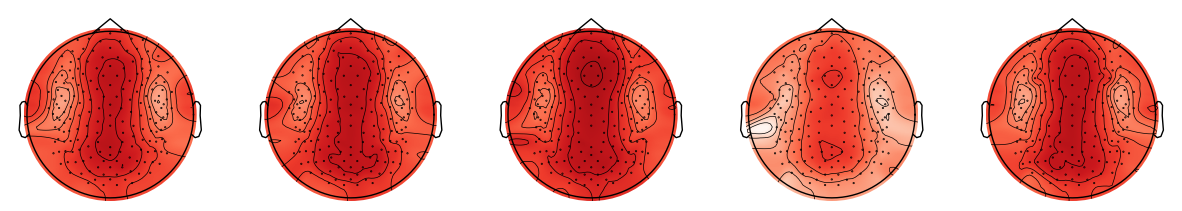

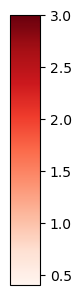

In [212]:
ax = iter(make_axes(5, 5, figsize=(15, 20)))

mne.viz.plot_topomap(data = np.mean(S_N1_K,axis=0), pos = raw.info, vlim=(0.4,3),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(S_N2_K,axis=0), pos = raw.info, vlim=(0.4,3),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(S_N3_K,axis=0), pos = raw.info, vlim=(0.4,3),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(S_RM_K,axis=0), pos = raw.info, vlim=(0.4,3),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(S_AW_K,axis=0), pos = raw.info, vlim=(0.4,3),axes=next(ax), show=False)

plt.savefig("Group_Topo_Slope.svg", dpi = 600 )

plot_topo_colorbar(0.4,3, 'Slope')
plt.savefig("Group_Topo_Slope_CB.svg", dpi = 600 )

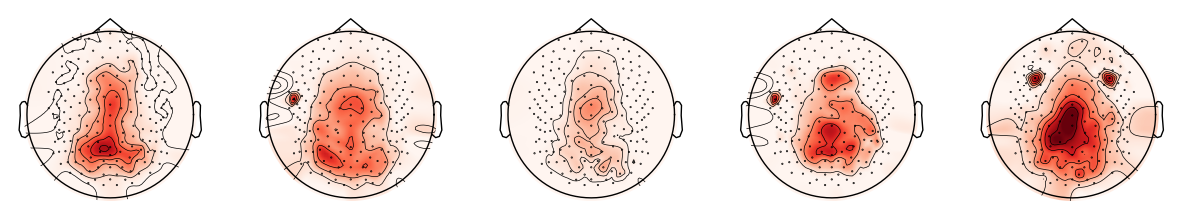

In [208]:
ax = iter(make_axes(5, 5, figsize=(15, 20)))

mne.viz.plot_topomap(data = np.mean(X_N1,axis=0), pos = raw.info, vlim=(1,2.5),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(X_N2,axis=0), pos = raw.info, vlim=(1,2.5),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(X_N3,axis=0), pos = raw.info, vlim=(1,2.5),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(X_R,axis=0), pos = raw.info, vlim=(1,2.5),axes=next(ax), show=False)

mne.viz.plot_topomap(data = np.mean(X_W,axis=0), pos = raw.info, vlim=(1,2.5),axes=next(ax), show=False)

plt.savefig("Group_Topo_Knee.svg", dpi = 600 )

In [204]:
from matplotlib import cm, colors, colorbar
def plot_topo_colorbar(vmin, vmax, label, save_fig=True):
    """Creates a colorbar for the topography plots.
    vmin: int
    vmax: int
    label: str
    saave_fig: bool
    """
    fig = plt.figure(figsize=(2, 3))
    ax1 = fig.add_axes([0.9, 0.25, 0.15, 0.9])

    cmap = cm.Reds
    norm = colors.Normalize(vmin=vmin, vmax=vmax)

    cb1 = colorbar.ColorbarBase(plt.gca(), cmap=cmap,
                                norm=norm, orientation='vertical')



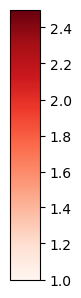

In [209]:
plot_topo_colorbar(1,2.5, 'Knee_Freq')
plt.savefig("Group_Topo_Knee_CB.svg", dpi = 600 )

In [119]:
min(np.concatenate((np.mean(R_N1_K,axis=0),np.mean(R_N2_K,axis=0),np.mean(R_RM_K,axis= 0), np.mean(R_N3_K,axis=0),
                            np.mean(R_AW_K,axis=0)),axis=0))

0.9077297245869392

In [124]:
KK_max

26362846.32955721

In [ ]:
ax = make_axes(25, 5, figsize=(15, 20))

SLNK_min = min(np.reshape(SL_NK,5*183))
SLNK_max = max(np.reshape(SL_NK,5*183))
R2NK_min = min(np.reshape(R2_NK,5*183))
R2NK_max = max(np.reshape(R2_NK,5*183))

SLK_min = min(np.reshape(SL_K,5*183))
SLK_max = max(np.reshape(SL_K,5*183))
R2K_min = min(np.reshape(R2_K,5*183))
R2K_max = max(np.reshape(R2_K,5*183))
KNK_min = min(np.reshape(KN_K,5*183))
KNK_max = max(np.reshape(KN_K,5*183))

i = 0
for S in range(5):
    
    im, cm = mne.viz.plot_topomap(data = SL_NK[S], pos = raw.info, vlim=(SLNK_min,SLNK_max),axes=ax[i], show=False)
    mne.viz.plot_topomap(data = R2_NK[S], pos = raw.info, vlim=(R2NK_min,R2NK_max), axes=ax[i+1], show=False)
    mne.viz.plot_topomap(data = SL_K[S] , pos = raw.info, vlim=(SLK_min,SLK_max), axes=ax[i+2], show=False)
    mne.viz.plot_topomap(data = R2_K[S] , pos = raw.info, vlim=(R2K_min,R2K_max), axes=ax[i+3], show=False)
    mne.viz.plot_topomap(data = KN_K[S] , pos = raw.info, vlim=(KNK_min,KNK_max), axes=ax[i+4], show=False)
    i = i+5
  

In [109]:
SK_max

12.224559079901189

In [68]:
PSD_Data = [N1n[1],N2n[1],N3n[1],RMn[1],AWn[1]]
    
SL_NK =np.ones([len(PSD_Data),len(EEG.ch_names)]) * np.nan
R2_NK =np.ones([len(PSD_Data),len(EEG.ch_names)]) * np.nan
SL_K  =np.ones([len(PSD_Data),len(EEG.ch_names)]) * np.nan
R2_K  =np.ones([len(PSD_Data),len(EEG.ch_names)]) * np.nan
KN_K  =np.ones([len(PSD_Data),len(EEG.ch_names)]) * np.nan

In [69]:
 i = 0
for S in PSD_Data: 
        fm1.fit(N1._freqs, np.mean(S, axis = 0), [N1._freqs[0] , N1._freqs[-1]])
        SL_NK[i,0:183] = fm1.get_params('aperiodic_params','exponent')
        R2_NK[i,0:183]  = fm1.get_params('r_squared')


        fm2.fit(N1._freqs, np.mean(S, axis = 0), [N1._freqs[0] , N1._freqs[-1]])
        SL_K[i,0:183]  = fm2.get_params('aperiodic_params','exponent')
        KN_K[i,0:183]   = fm2.get_params('aperiodic_params','knee')
        R2_K[i,0:183] = fm2.get_params('r_squared')

        i = i+1

Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

Running FOOOFGroup across 183 power spectra.
Running FOOOFGroup across 183 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

In [71]:
SL_NK

array([[ 0.96075641,  1.45766152,  1.50902414,  1.75484513,  1.98574419,
         2.57319543,  2.67743133,  2.21004998,  2.08383733,  1.42961832,
         1.30310661,  1.75881163,  2.12471041,  2.1466387 ,  2.21527083,
         2.21842366,  2.10057897,  1.51961329,  1.52921418,  2.10089611,
         2.21034619,  2.19439082,  2.14820698,  2.05214715,  1.37439381,
         1.91925511,  2.10602931,  2.15360928,  2.06670531,  1.89958754,
         1.3734973 ,  1.50258589,  1.41120986,  1.81407639,  1.8049075 ,
         1.39938105,  1.17579417,  1.27524857,  1.5082802 ,  1.49235332,
         1.69032986,  1.8922439 ,  1.90112678,  1.97649036,  1.29782039,
         1.24297972,  1.17870926,  1.14700155,  1.1569154 ,  1.36647014,
         1.56016584,  1.8361811 ,  1.26340444,  1.09836937,  0.89423618,
         1.07685748,  0.93235098,  1.24411899,  1.654908  ,  1.29051006,
         1.01677502,  0.8806256 ,  1.02671058,  0.93843516,  1.31959591,
         1.02574091,  0.90492935,  0.97928696,  1.1

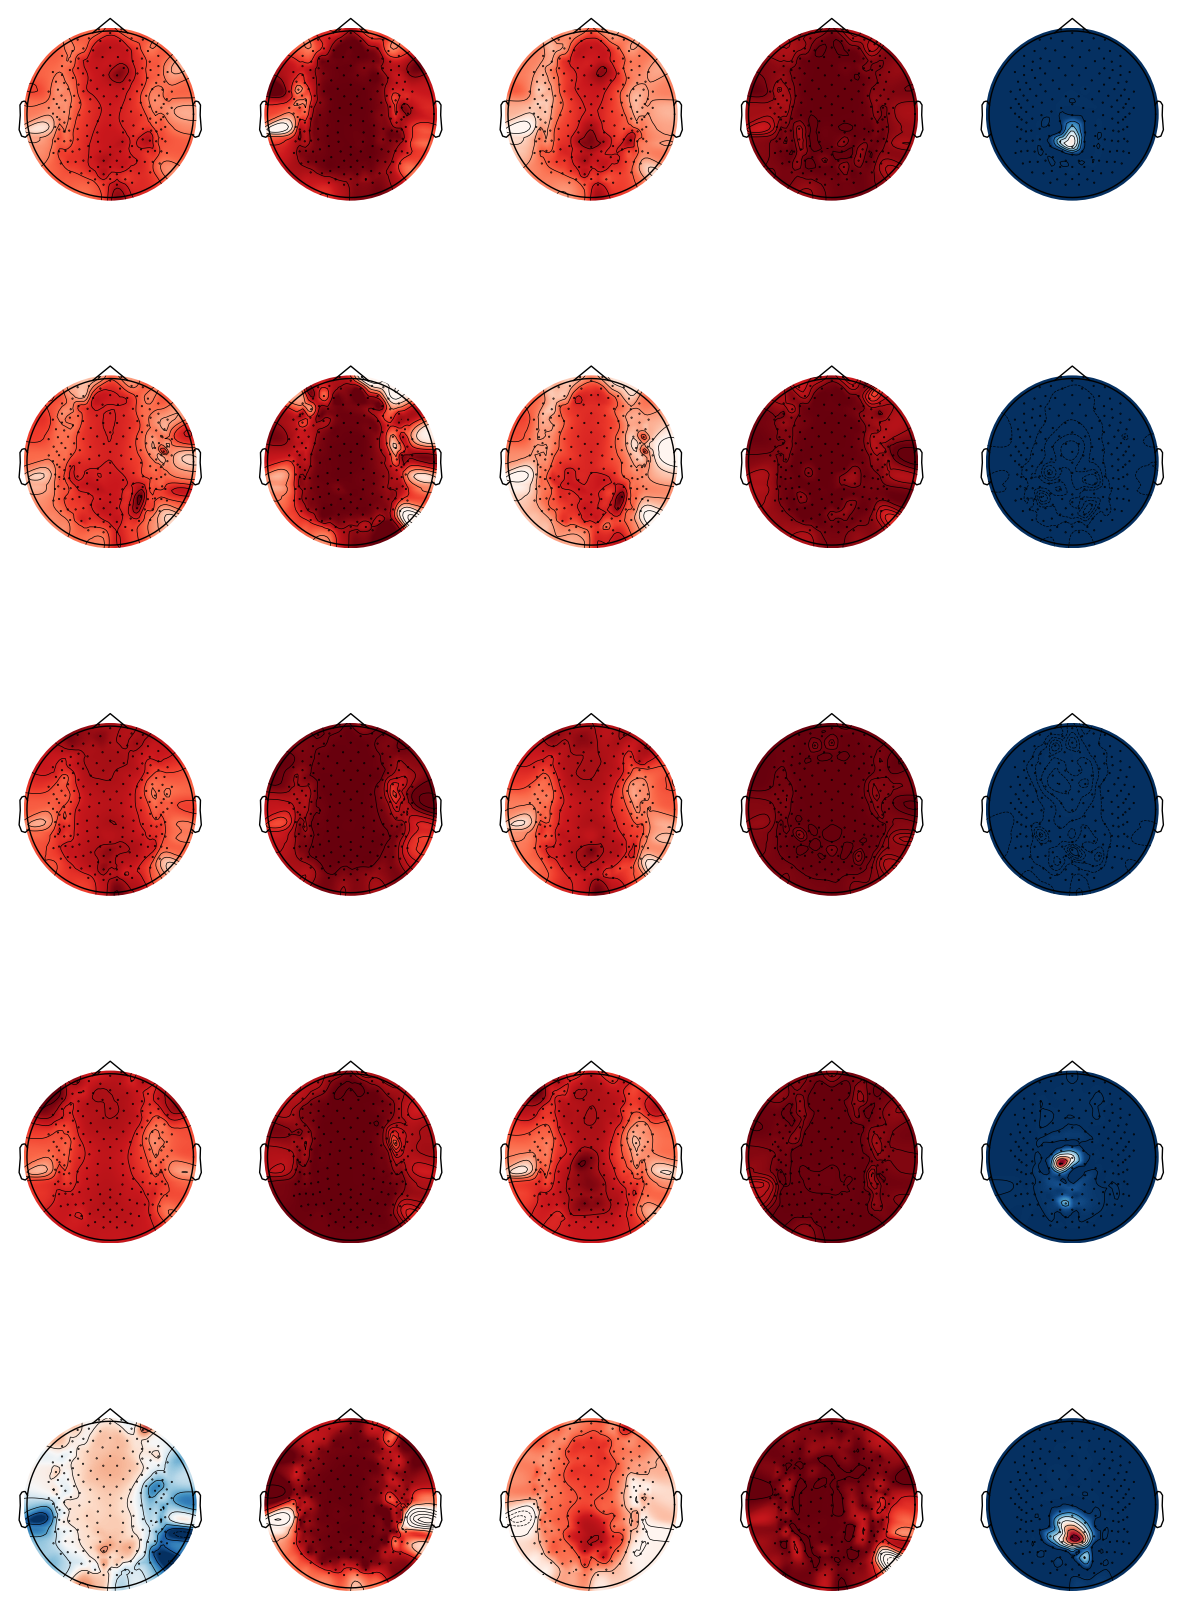

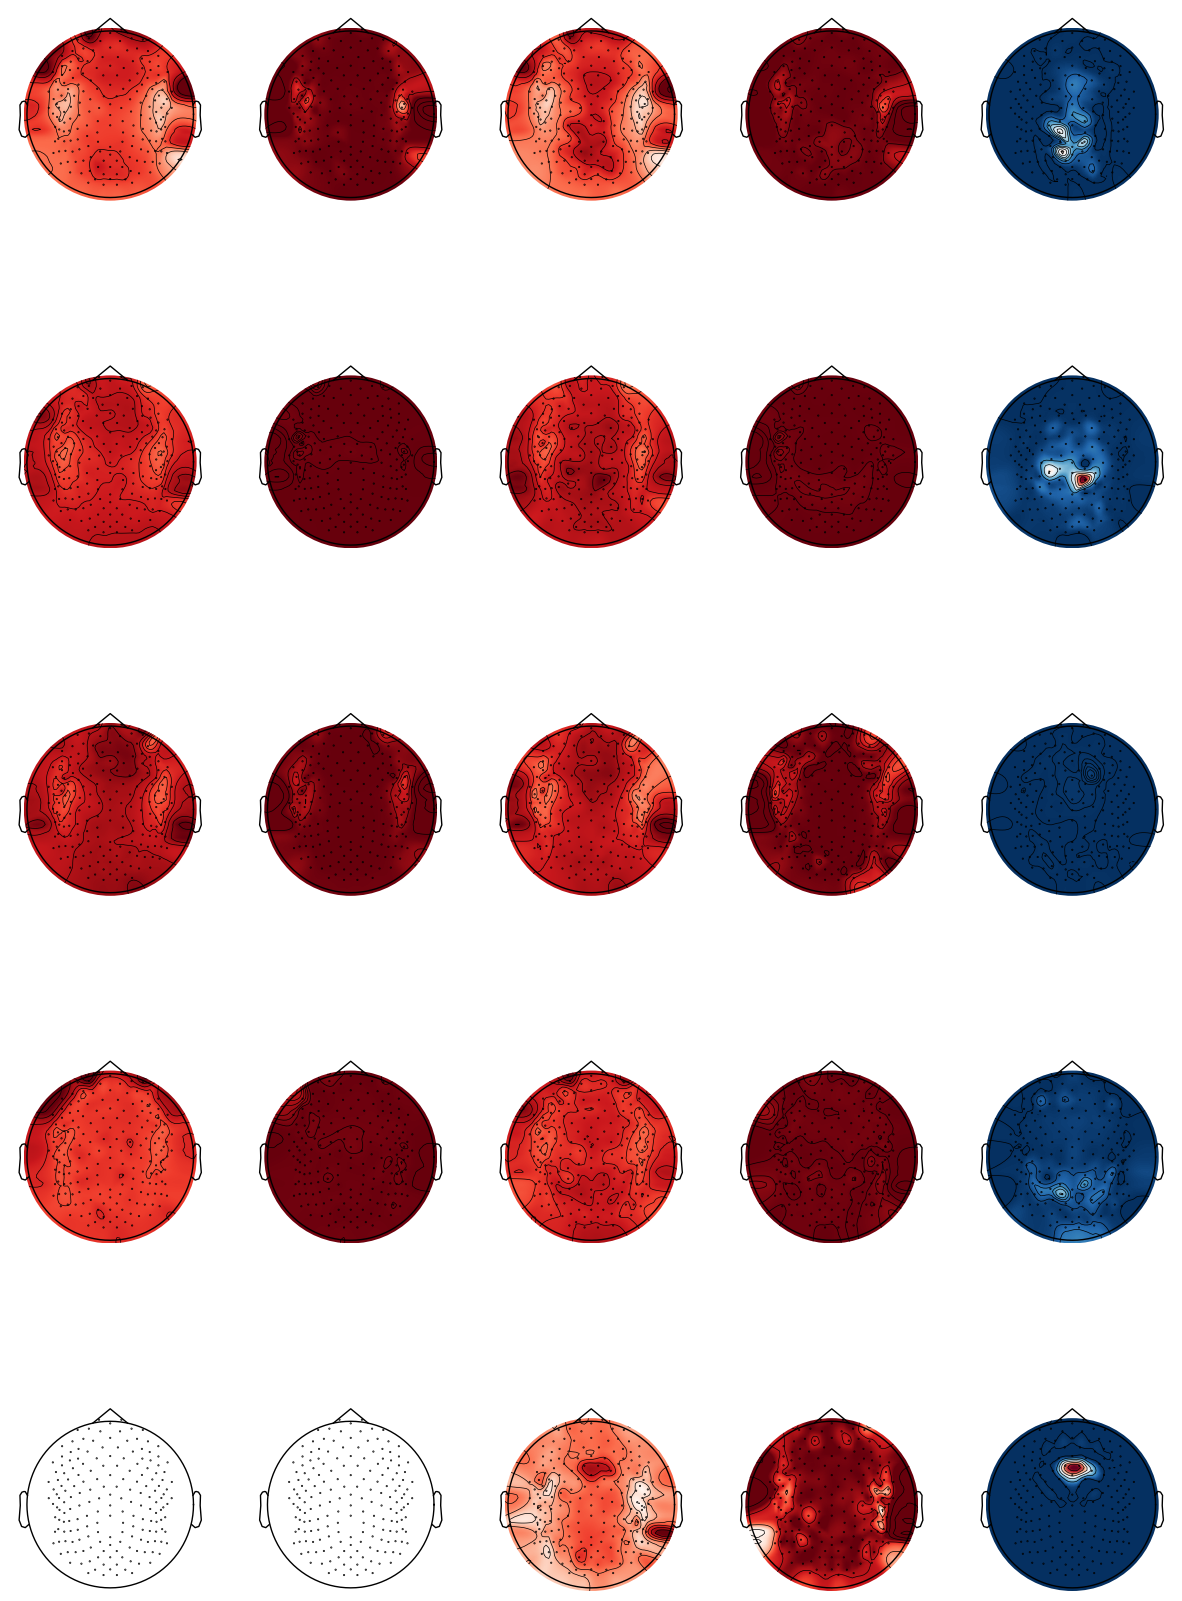